# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')
workouts_users.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

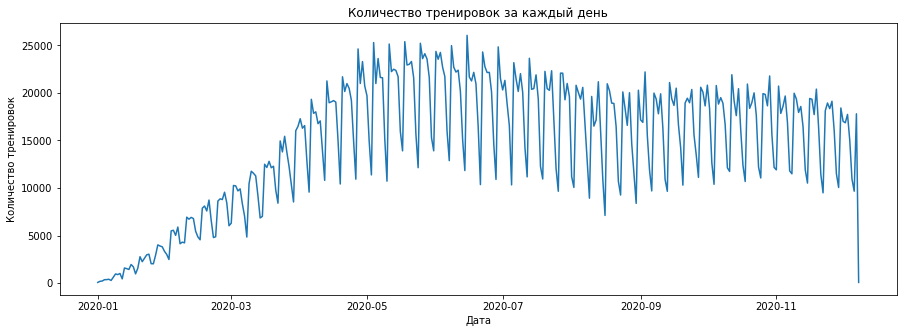

In [288]:
trainings_by_day = workouts_users.resample('1D', on='start_at').sum()['workouts_total']
plt.figure(figsize=(15, 5))
plt.title("Количество тренировок за каждый день")
plt.xlabel("Дата")
plt.ylabel("Количество тренировок")
plt.plot(trainings_by_day)
# В начале и в конце года количество тренировок снижается. Максимальное количество тренировок летом. Возможно это зависит от
#теплого времени года или из-за отпусков.

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [220]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 
trainers_select

{1490944,
 1081344,
 10649601,
 7503879,
 278540,
 5955596,
 2162706,
 4104211,
 24596,
 1982485,
 7045145,
 7045146,
 6635547,
 4120604,
 7725088,
 2236453,
 9936934,
 7561255,
 6643752,
 2719784,
 7634989,
 5324848,
 6570033,
 1474609,
 4350003,
 6774836,
 3276853,
 7741496,
 2547769,
 7413817,
 7544890,
 5488702,
 1613886,
 1876033,
 5316675,
 2859075,
 4055107,
 24646,
 4128838,
 1409095,
 5218377,
 3227722,
 10518605,
 1925198,
 1876047,
 2203726,
 6684752,
 10911826,
 3276884,
 1409108,
 5546070,
 7561303,
 2859096,
 7094370,
 4391010,
 7061603,
 6971492,
 5693542,
 7127143,
 6193263,
 6193264,
 10256496,
 1876082,
 2654323,
 3997808,
 7127158,
 4210807,
 7004278,
 2277497,
 10338426,
 2662525,
 5546113,
 1990788,
 10518665,
 7438473,
 6774924,
 7643277,
 5374096,
 6709394,
 10494102,
 6815899,
 4006045,
 6774942,
 10322079,
 450720,
 6897822,
 3719332,
 3023015,
 1949869,
 10682541,
 5841070,
 2777264,
 1114289,
 5128366,
 991411,
 737460,
 7798965,
 2162866,
 5963959,
 2007226,

In [44]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [86]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировокзжххххх
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8
...,...,...,...
1612,10787796,Sales,1
1613,10790388,Sales,2
1614,10790715,Sales,2
1615,10803397,Sales,2


In [51]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments



{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

(array([564., 411., 411., 132.,  51.,  33.,   8.,   5.,   1.,   1.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <BarContainer object of 10 artists>)

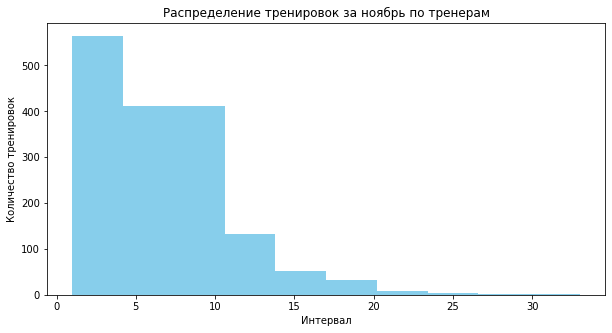

In [117]:
plt.figure(figsize=(10,5)) 
plt.title("Распределение тренировок за ноябрь по тренерам")
plt.xlabel("Интервал")
plt.ylabel("Количество тренировок")
plt.hist(workouts_by_trainer['workouts'], color='skyblue')


Sales
Athletic
Sports Reserves
Consultant
Cycling
Spartacus
Dinamo


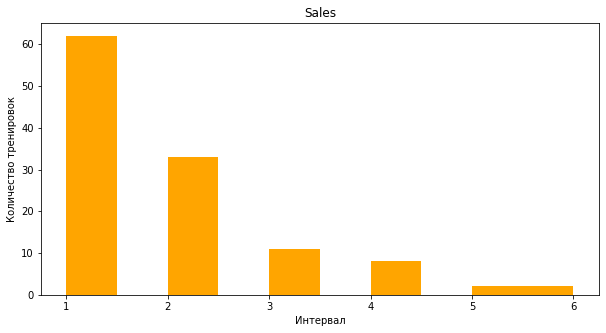

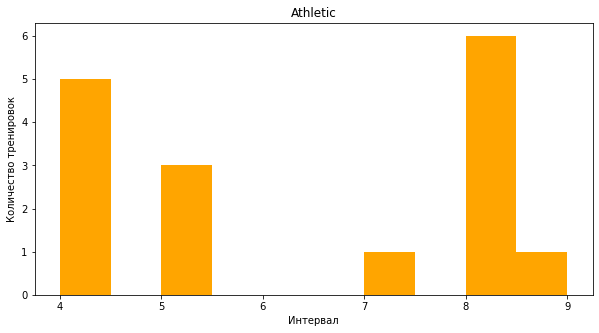

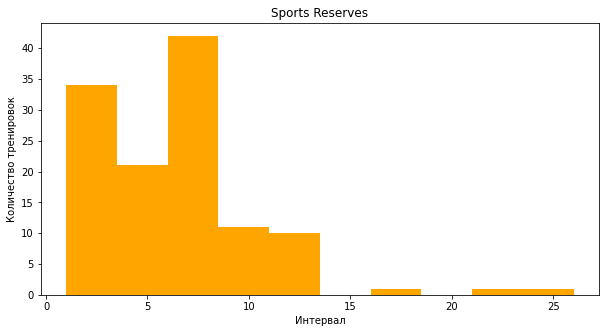

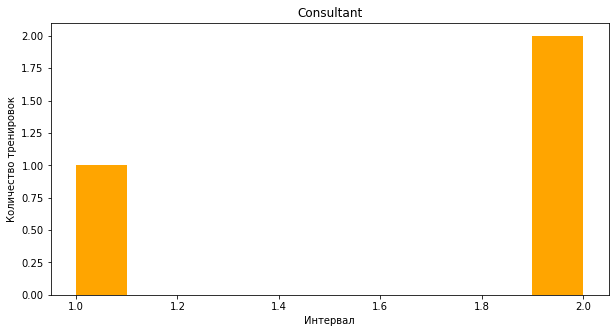

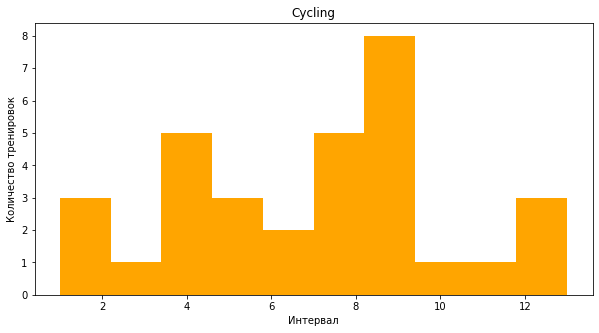

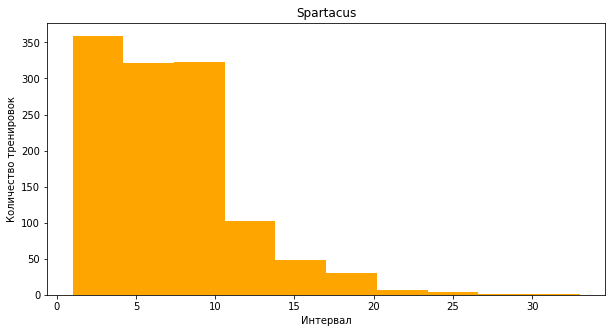

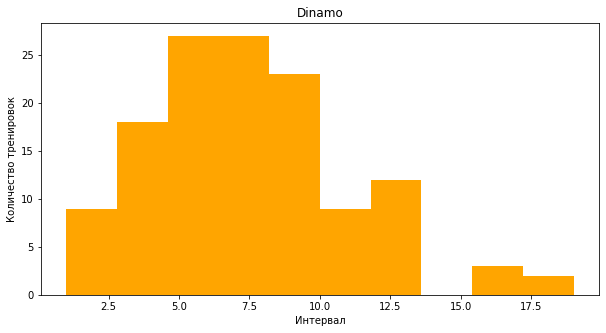

In [113]:
for i in departments:
    print(i)
    plt.figure(figsize=(10,5)) 
    plt.title("{}".format(i))
    plt.xlabel("Интервал")
    plt.ylabel("Количество тренировок")
    plt.hist(workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == i]['workouts'], bins=10, color='orange')

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

<AxesSubplot:xlabel='trainer_department', ylabel='workouts'>

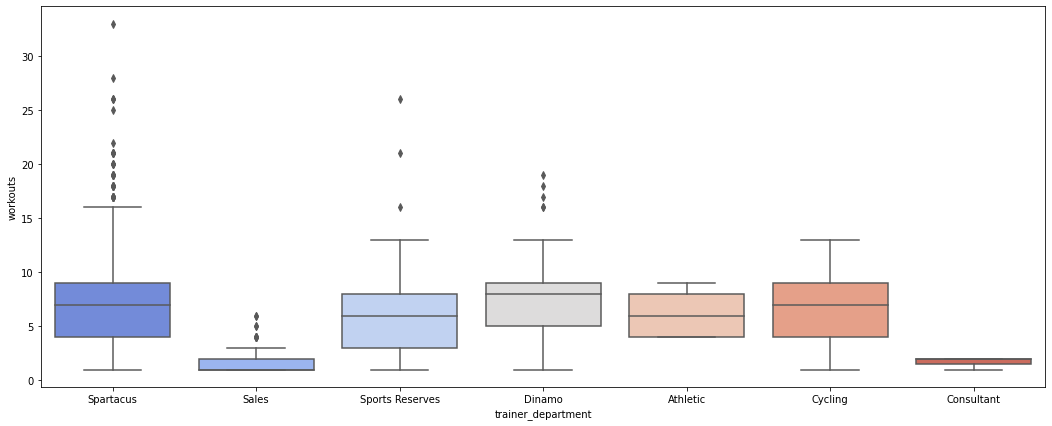

In [160]:
plt.figure(figsize=(18,7))
sns.boxplot(x='trainer_department', y = 'workouts', data=workouts_by_trainer, palette='coolwarm')
#Есть департаменты, у которых слишком маленькая нашрузка. Необходимо ее правильно распределить. Например часть работы с 
#департамента Spartacus убрать на Consultant, с Sport Reserves на Athletic, с Dinamo на Cycling.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет с**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [176]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


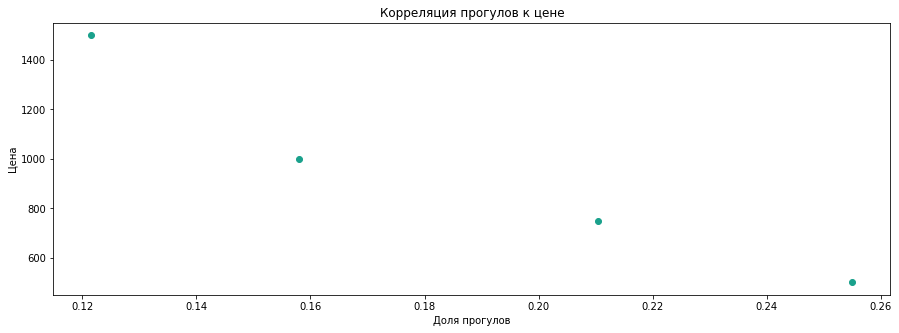

In [207]:
cost_age_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index()
plt.figure(figsize=(15,5)) 
plt.title('Корреляция прогулов к цене')
plt.xlabel("Доля прогулов")
plt.ylabel("Цена")
plt.scatter(cost_age_data_agg['status'], cost_age_data_agg['cost'], c = [[0.1, 0.63, 0.55]]) 


3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

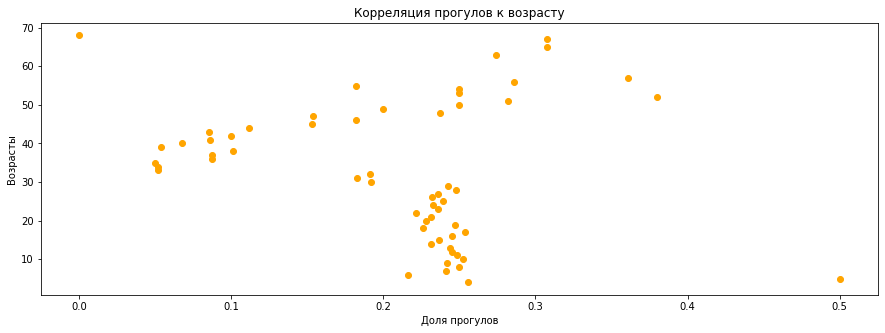

In [211]:
cost_age_data_agg = cost_age_data.groupby(['age'])['status'].mean().reset_index()
plt.figure(figsize=(15,5)) 
plt.title('Корреляция прогулов к возрасту')
plt.xlabel("Доля прогулов")
plt.ylabel("Возраст")
plt.scatter(cost_age_data_agg['status'], cost_age_data_agg['age'], c="orange") 


4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

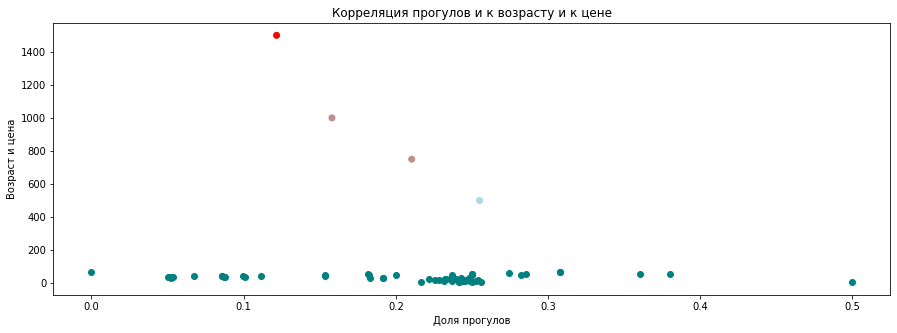

In [273]:
cost_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index()
price_color = {500:'lightblue', 750:'rosybrown', 1000:'rosybrown', 1500:'red'}
plt.title('Корреляция прогулов и к возрасту и к цене')
plt.xlabel("Доля прогулов")
plt.ylabel("Возраст и цена")
plt.scatter(age_data_agg['status'], age_data_agg['age'], c="teal") 
plt.scatter(cost_data_agg['status'], cost_data_agg['cost'], c=cost_data_agg['cost'].map(price_color)) 



## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [201]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [275]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


Text(0.5, 1.0, 'Тепловая карта')

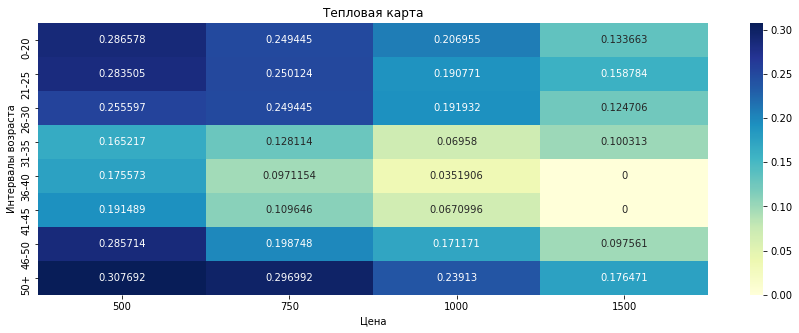

In [284]:
pivot_table = cost_age_data_agg.pivot(index='age_bin', columns='cost', values='status')
plt.figure(figsize=(15,5))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Цена")
plt.ylabel("Интервалы возраста")
plt.title('Тепловая карта')
# Пропуски напрямую зависят от цены тренировки. Где стоимость большая - там меньше пропускают. Также видна прямая зависимость 
#пропусков от возраста. Где маленькая цена тренировки и возраст 50+ - самая большая цифра пропусков. 

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [285]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01       71
2020-01-02      184
2020-01-03      215
2020-01-04      354
2020-01-05      364
              ...  
2020-12-04    15023
2020-12-05    10940
2020-12-06     9665
2020-12-07    17807
2020-12-08       70
Freq: D, Name: workouts_total, Length: 343, dtype: int64

In [286]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,71,2,Wednesday
1,2020-01-02,184,3,Thursday
2,2020-01-03,215,4,Friday
3,2020-01-04,354,5,Saturday
4,2020-01-05,364,6,Sunday
...,...,...,...,...
338,2020-12-04,15023,4,Friday
339,2020-12-05,10940,5,Saturday
340,2020-12-06,9665,6,Sunday
341,2020-12-07,17807,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [287]:
trainings_by_day_frame['week_day_num'] += 1

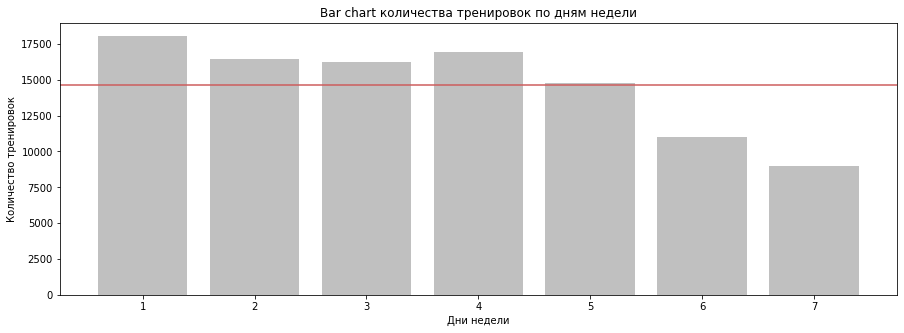

In [315]:
week_day_num_workouts = trainings_by_day_frame.groupby(['week_day_num'])['workouts'].mean().reset_index()
mean = trainings_by_day_frame['workouts'].mean()
plt.figure(figsize=(15,5))
plt.xlabel("Дни недели")
plt.ylabel("Количество тренировок")
plt.title('Bar chart количества тренировок по дням недели')
plt.bar(week_day_num_workouts['week_day_num'], week_day_num_workouts['workouts'], color='silver')
plt.axhline(y=mean, color='indianred', linestyle='-')
#По графику видно, что в начален недели и в середине самое большок количество тренировок. В Субботу и в Воскресение
#активность сильно падает. Это связанно с усталостью в конце недели и желанием отдохнуть.

# 🎉🎉🎉 Поздравляем, ты великолепен! 